# **Knowledge Based Topic Retrieval for Recommendations and Tourism Promotions**

Technical Steps
1. Get data from Tripadvisor✅
2. Preparing Env✅
3. Data pre-processing
<ul>
  <li>Case Folding✅</li>
  <li>Tokenization✅</li>
  <li>Remove Slang✅</li>
  <li>Stem✅</li>
  <li>Stopword Removal✅</li>
  <li>Rejoin✅</li>
</ul>
4. Feature Engineering
<ul>
  <li>Vectorization✅</li>
  <li>Normalization Using MinMaxScaler✅</li>
  <li>Balancing with SMOTE✅</li>
</ul>
5. Review Stars Classification
<ul>
  <li>Random Forest</li>
  <li>Decision Tree</li>
  <li>Logistic Regression</li>
  <li>K-NN</li>
  <li>Support Vector Machine</li>
</ul>
6. Clustering and Elbow Method
7. Modeling with LDA, NMF, K-Means Clustering



---


## 1. Get Data from Tripadvisor

Data gathered by using Webscapper.io from top 30 Hotel in Tripadvisor



---


## 2. Preparing Environment




In [ ]:
# 2.1. Mount Google Drive and default dataset path
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/Python/Dataset/'

In [ ]:
pip list

In [ ]:
!pip install --upgrade pillow

In [ ]:
# 2.2. Install Sastrawi
!pip install Sastrawi
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install nltk
!pip install glob
!pip install os
!pip install sys
!pip install wordcloud
!pip install --upgrade pillow
!pip install sklearn
!pip install imblearn

In [1]:
# 2.3. Import Installed Library
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import glob
import os
import sys
from ast import literal_eval
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import wordcloud
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tinob\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tinob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
path = os.getcwd()+'/Dataset/'

In [ ]:
# 2.4. Import Data
slang_df = pd.read_csv('https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv')


# Combine All Hotel CSV from Google Drive 'Dataset' folder
hotel_csv = os.path.join(path, '*.csv')
joined_review = glob.glob(hotel_csv)

hotel_df = pd.concat(map(pd.read_csv, joined_review), ignore_index=True)

In [ ]:
slang_df = pd.read_csv('https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv')

In [ ]:
hotel_df.info()

In [ ]:
# Drop Unnecessary Column
hotel_df = hotel_df.drop(hotel_df.columns[0], axis = 1)

In [ ]:
hotel_df.head()

In [ ]:
slang_df.head()



---


## 3. Data Preprocessing

In [ ]:
# 3.1. Case Folding
hotel_df['review'] = hotel_df['review'].str.lower()

In [ ]:
# 3.2. Tokenization
def tokenizeWords(s, remove_punctuation=True):
  if remove_punctuation == True:
    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|S+')
    clean_words = tokenizer.tokenize(s)
  else:
    clean_words = nltk.word_tokenize(s)
  return clean_words

hotel_df['tokenized'] = hotel_df['review'].apply(tokenizeWords)
tokenized = pd.DataFrame({'review' : hotel_df['review'], 'tokenized' : hotel_df['review'].apply(tokenizeWords)})

In [ ]:
# 3.3. Remove Slang
# Remove trailing whitespace
slang_df['slang'] = slang_df['slang'].apply(lambda x:x.strip())
slang_df['formal'] = slang_df['formal'].apply(lambda x:x.strip())

In [ ]:
# Transform into key value pairs in a dict
slang_dict = {}
for idx, row in slang_df.iterrows():
  slang_dict.update({row['slang']: row['formal']})

def replaceSlang(tokens):
  for i, word in enumerate(tokens):
    try:
      tokens[i] = slang_dict[word]
    except:
      KeyError
  return tokens

no_slang = pd.DataFrame({'review' : hotel_df['review'], 'no_slang' : tokenized['tokenized'].apply(replaceSlang)})
hotel_df = pd.merge(hotel_df, no_slang, on='review')

In [ ]:
hotel_df.head(20)

In [ ]:
# 3.4. Stem
def stemWords(tokens):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    
    return [stemmer.stem(t) for t in tokens]

hotel_df['stemmed'] = hotel_df['no_slang'].apply(stemWords)

**Proses Stem memakan waktu yang sangat lama. Untuk memangkas waktu, peneliti sudah membuat dataset dimana proses stem telah selesai.**

In [2]:
hotel_df = pd.read_csv('stemmed_review.csv')
hotel_df = hotel_df.drop(hotel_df.columns[0], axis = 1)
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21683 entries, 0 to 21682
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     21683 non-null  object
 1   stars      21683 non-null  int64 
 2   tokenized  21683 non-null  object
 3   no_slang   21683 non-null  object
 4   stemmed    21683 non-null  object
dtypes: int64(1), object(4)
memory usage: 847.1+ KB


In [3]:
hotel_df.head(10)

,review,stars,tokenized,no_slang,stemmed
0,"liburan keluarga yg nyaman, kolam renang yg ba...",5,"['liburan', 'keluarga', 'yg', 'nyaman', 'kolam...","['liburan', 'keluarga', 'yang', 'nyaman', 'kol...","['libur', 'keluarga', 'yang', 'nyaman', 'kolam..."
1,hotelnya bagus banget dan pelayanannya sangat ...,5,"['hotelnya', 'bagus', 'banget', 'dan', 'pelaya...","['hotelnya', 'bagus', 'banget', 'dan', 'pelaya...","['hotel', 'bagus', 'banget', 'dan', 'layan', '..."
2,saya menginap di adiwana bisma bersama pasanga...,5,"['saya', 'menginap', 'di', 'adiwana', 'bisma',...","['saya', 'menginap', 'di', 'adiwana', 'bisma',...","['saya', 'inap', 'di', 'adiwana', 'bisma', 'sa..."
3,"hotelnya bagus banget, bersih dan lengkap fasi...",5,"['hotelnya', 'bagus', 'banget', 'bersih', 'dan...","['hotelnya', 'bagus', 'banget', 'bersih', 'dan...","['hotel', 'bagus', 'banget', 'bersih', 'dan', ..."
4,weekend di adiwana bisma stay selama two night...,5,"['weekend', 'di', 'adiwana', 'bisma', 'stay', ...","['weekend', 'di', 'adiwana', 'bisma', 'stay', ...","['weekend', 'di', 'adiwana', 'bisma', 'stay', ..."
5,stay one night bareng keluarga sangat menyenan...,5,"['stay', 'one', 'night', 'bareng', 'keluarga',...","['stay', 'one', 'night', 'bareng', 'keluarga',...","['stay', 'one', 'night', 'bareng', 'keluarga',..."
6,daycation di adiwana bisma sangat menyenangkan...,5,"['daycation', 'di', 'adiwana', 'bisma', 'sanga...","['daycation', 'di', 'adiwana', 'bisma', 'sanga...","['daycation', 'di', 'adiwana', 'bisma', 'sanga..."
7,"hotelnya masih terbilang baru, ada restaurantn...",5,"['hotelnya', 'masih', 'terbilang', 'baru', 'ad...","['hotelnya', 'masih', 'terbilang', 'baru', 'ad...","['hotel', 'masih', 'bilang', 'baru', 'ada', 'r..."
8,thank you so much buat pelayanan yang ramah da...,5,"['thank', 'you', 'so', 'much', 'buat', 'pelaya...","['thank', 'you', 'sok', 'much', 'buat', 'pelay...","['thank', 'you', 'sok', 'much', 'buat', 'layan..."
9,"kamar hotel yang besar, bersih dan mewah, ling...",5,"['kamar', 'hotel', 'yang', 'besar', 'bersih', ...","['kamar', 'hotel', 'yang', 'besar', 'bersih', ...","['kamar', 'hotel', 'yang', 'besar', 'bersih', ..."


In [4]:
# Fixing 'stemmed' column structure after converting to CSV file
hotel_df['stemmed'] = hotel_df['stemmed'].apply(literal_eval)

In [13]:
# 3.5. Stopword Removal
nltk_lib = stopwords.words('indonesian')

# Additional words from GitHub for NLTK Stopwords 
add_words = open('add_stopwords.txt', 'r')
data = add_words.read()
list_add_words = data.split('\n')
add_words.close()

custom_words = [
    'hotel',
    'resort',
    'hotel',
    'inap',
    'stay',
    'villa',
    'resor',
    'banget',
    'night',
    'bal',
    'n',
    'ju',
    'two',
    'libur',
    'staff',
    'staf',
    'dtype',
    'Name',
    'object',
    'Length',
    'bagus',
    'udaya',
    'nya',
    'final',
    'nginep',
    'kalo',
    'mulaidari',
    'istri'
    
]

stops = nltk_lib + list_add_words + custom_words

In [14]:
def removeStopWords(tokens):
    return [t for t in tokens if t not in stops]

In [15]:
hotel_df['cleaned'] = hotel_df['stemmed'].apply(removeStopWords)

In [16]:
hotel_df.head(30)

,review,stars,tokenized,no_slang,stemmed,cleaned,final
0,"liburan keluarga yg nyaman, kolam renang yg ba...",5,"['liburan', 'keluarga', 'yg', 'nyaman', 'kolam...","['liburan', 'keluarga', 'yang', 'nyaman', 'kol...","[libur, keluarga, yang, nyaman, kolam, renang,...","[keluarga, nyaman, kolam, renang, kamar, bersi...",keluarga nyaman kolam renang kamar bersih pand...
1,hotelnya bagus banget dan pelayanannya sangat ...,5,"['hotelnya', 'bagus', 'banget', 'dan', 'pelaya...","['hotelnya', 'bagus', 'banget', 'dan', 'pelaya...","[hotel, bagus, banget, dan, layan, sangat, bai...","[layan, suka, tingkat, layan, unjung]",layan istri suka tingkat layan unjung
2,saya menginap di adiwana bisma bersama pasanga...,5,"['saya', 'menginap', 'di', 'adiwana', 'bisma',...","['saya', 'menginap', 'di', 'adiwana', 'bisma',...","[saya, inap, di, adiwana, bisma, sama, pasang,...","[adiwana, bisma, pasang, kamar, bersih, luas, ...",adiwana bisma pasang kamar bersih luas kasih f...
3,"hotelnya bagus banget, bersih dan lengkap fasi...",5,"['hotelnya', 'bagus', 'banget', 'bersih', 'dan...","['hotelnya', 'bagus', 'banget', 'bersih', 'dan...","[hotel, bagus, banget, bersih, dan, lengkap, f...","[bersih, lengkap, fasilitas, poolnya, cantik, ...",bersih lengkap fasilitas poolnya cantik pandan...
4,weekend di adiwana bisma stay selama two night...,5,"['weekend', 'di', 'adiwana', 'bisma', 'stay', ...","['weekend', 'di', 'adiwana', 'bisma', 'stay', ...","[weekend, di, adiwana, bisma, stay, lama, two,...","[weekend, adiwana, bisma, senang, puas, layan,...",weekend adiwana bisma senang puas layan recept...
5,stay one night bareng keluarga sangat menyenan...,5,"['stay', 'one', 'night', 'bareng', 'keluarga',...","['stay', 'one', 'night', 'bareng', 'keluarga',...","[stay, one, night, bareng, keluarga, sangat, s...","[one, bareng, keluarga, senang, kamar, luas, v...",one bareng keluarga senang kamar luas view tar...
6,daycation di adiwana bisma sangat menyenangkan...,5,"['daycation', 'di', 'adiwana', 'bisma', 'sanga...","['daycation', 'di', 'adiwana', 'bisma', 'sanga...","[daycation, di, adiwana, bisma, sangat, senang...","[daycation, adiwana, bisma, senang, staffnya, ...",daycation adiwana bisma senang staffnya ramah ...
7,"hotelnya masih terbilang baru, ada restaurantn...",5,"['hotelnya', 'masih', 'terbilang', 'baru', 'ad...","['hotelnya', 'masih', 'terbilang', 'baru', 'ad...","[hotel, masih, bilang, baru, ada, restaurantny...","[bilang, restaurantnya, roomnya, luas, bersih,...",bilang restaurantnya roomnya luas bersih pooln...
8,thank you so much buat pelayanan yang ramah da...,5,"['thank', 'you', 'so', 'much', 'buat', 'pelaya...","['thank', 'you', 'sok', 'much', 'buat', 'pelay...","[thank, you, sok, much, buat, layan, yang, ram...","[thank, you, sok, much, layan, ramah, kamar, b...",thank you sok much layan ramah kamar bersih ma...
9,"kamar hotel yang besar, bersih dan mewah, ling...",5,"['kamar', 'hotel', 'yang', 'besar', 'bersih', ...","['kamar', 'hotel', 'yang', 'besar', 'bersih', ...","[kamar, hotel, yang, besar, bersih, dan, mewah...","[kamar, bersih, mewah, lingkung, desa, asri, s...",kamar bersih mewah lingkung desa asri sarap pa...


In [17]:
# 3.6. Rejoin Token

def rejoinToken(token):
    return (' '.join(t for t in token))


hotel_df['final'] = hotel_df['cleaned'].apply(rejoinToken)

In [18]:
hotel_df

,review,stars,tokenized,no_slang,stemmed,cleaned,final
0,"liburan keluarga yg nyaman, kolam renang yg ba...",5,"['liburan', 'keluarga', 'yg', 'nyaman', 'kolam...","['liburan', 'keluarga', 'yang', 'nyaman', 'kol...","[libur, keluarga, yang, nyaman, kolam, renang,...","[keluarga, nyaman, kolam, renang, kamar, bersi...",keluarga nyaman kolam renang kamar bersih pand...
1,hotelnya bagus banget dan pelayanannya sangat ...,5,"['hotelnya', 'bagus', 'banget', 'dan', 'pelaya...","['hotelnya', 'bagus', 'banget', 'dan', 'pelaya...","[hotel, bagus, banget, dan, layan, sangat, bai...","[layan, suka, tingkat, layan, unjung]",layan suka tingkat layan unjung
2,saya menginap di adiwana bisma bersama pasanga...,5,"['saya', 'menginap', 'di', 'adiwana', 'bisma',...","['saya', 'menginap', 'di', 'adiwana', 'bisma',...","[saya, inap, di, adiwana, bisma, sama, pasang,...","[adiwana, bisma, pasang, kamar, bersih, luas, ...",adiwana bisma pasang kamar bersih luas kasih f...
3,"hotelnya bagus banget, bersih dan lengkap fasi...",5,"['hotelnya', 'bagus', 'banget', 'bersih', 'dan...","['hotelnya', 'bagus', 'banget', 'bersih', 'dan...","[hotel, bagus, banget, bersih, dan, lengkap, f...","[bersih, lengkap, fasilitas, poolnya, cantik, ...",bersih lengkap fasilitas poolnya cantik pandan...
4,weekend di adiwana bisma stay selama two night...,5,"['weekend', 'di', 'adiwana', 'bisma', 'stay', ...","['weekend', 'di', 'adiwana', 'bisma', 'stay', ...","[weekend, di, adiwana, bisma, stay, lama, two,...","[weekend, adiwana, bisma, senang, puas, layan,...",weekend adiwana bisma senang puas layan recept...
...,...,...,...,...,...,...,...
21678,villa pribadi yang menakjubkan dengan kolam re...,5,"['villa', 'pribadi', 'yang', 'menakjubkan', 'd...","['villa', 'pribadi', 'yang', 'menakjubkan', 'd...","[villa, pribadi, yang, takjub, dengan, kolam, ...","[pribadi, takjub, kolam, renang, ubud, damai, ...",pribadi takjub kolam renang ubud damai layak t...
21679,"hotel terbaik di bali untuk bulan madu anda, c...",5,"['hotel', 'terbaik', 'di', 'bali', 'untuk', 'b...","['hotel', 'terbaik', 'di', 'bali', 'untuk', 'b...","[hotel, baik, di, bal, untuk, bulan, madu, and...","[madu, cuaca, sempurna, fasilitas, pandang, in...",madu cuaca sempurna fasilitas pandang indah ko...
21680,udaya resort and spa adalah tempat yang cocok ...,4,"['udaya', 'resort', 'and', 'spa', 'adalah', 't...","['udaya', 'resort', 'and', 'spa', 'adalah', 't...","[udaya, resort, and, spa, adalah, tempat, yang...","[and, spa, cocok, santa, keluarga, buah, kolam...",and spa cocok santa keluarga buah kolam renang...
21681,resort yang luar biasa dengan layanan premium ...,5,"['resort', 'yang', 'luar', 'biasa', 'dengan', ...","['resort', 'yang', 'luar', 'biasa', 'dengan', ...","[resort, yang, luar, biasa, dengan, layan, pre...","[layan, premium, properti, bisnis, temu, kulin...",layan premium properti bisnis temu kuliner lez...


## Word Cloud Viz

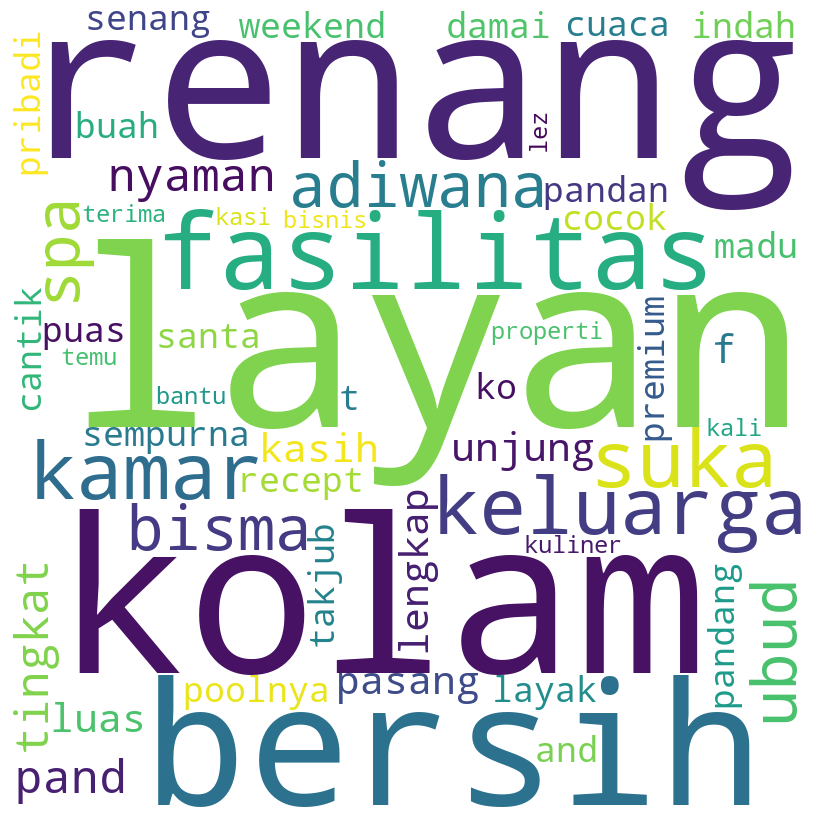

In [19]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stops,
                min_font_size = 10).generate(str(hotel_df['final']))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [12]:
contain_values = hotel_df[hotel_df['final'].str.contains('mulaidari')]
print(contain_values)

Empty DataFrame
Columns: [review, stars, tokenized, no_slang, stemmed, cleaned, final]
Index: []



---

## 4. Feature Engineering




In [20]:
## 4.1. Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

In [80]:
final_text = hotel_df.copy()
final_text = final_text[['final', 'stars']]

In [70]:
final_text = final_text.loc[:5000, :]

In [81]:
final_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21683 entries, 0 to 21682
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   final   21683 non-null  object
 1   stars   21683 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 338.9+ KB


In [82]:
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(final_text['final'])

In [83]:
## 4.2. Normalization
from sklearn.preprocessing import MaxAbsScaler
scaling = MaxAbsScaler()

features_scaled = scaling.fit_transform(features)

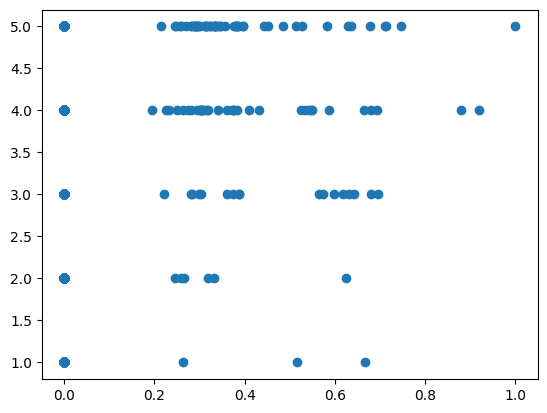

In [84]:
plt.scatter(features_scaled[:, 0].toarray(), final_text['stars'])

In [85]:
## 4.3. Balancing with SMOTE
final_text.groupby(['stars'])['stars'].count()

stars
1      204
2      369
3     1193
4     4625
5    15292
Name: stars, dtype: int64

In [86]:
x = final_text['stars'].sort_values().unique()
y = final_text.groupby(['stars'])['stars'].count()

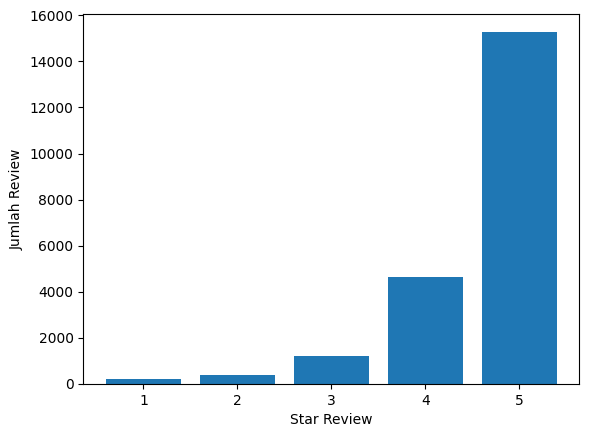

In [87]:
plt.bar(x, y)
plt.ylabel('Jumlah Review')
plt.xlabel('Star Review')

plt.show()

In [88]:
# Spliting Data
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score, balanced_accuracy_score
from sklearn.datasets import make_classification

X = features_scaled
y = final_text['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
y_train.value_counts()

5    12235
4     3675
3      975
2      298
1      163
Name: stars, dtype: int64

In [61]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()

X_res, y_res = sm.fit_resample(X_train, y_train)

In [62]:
y_res.value_counts()

1    12235
2    12235
3    12234
4    11326
5      214
Name: stars, dtype: int64

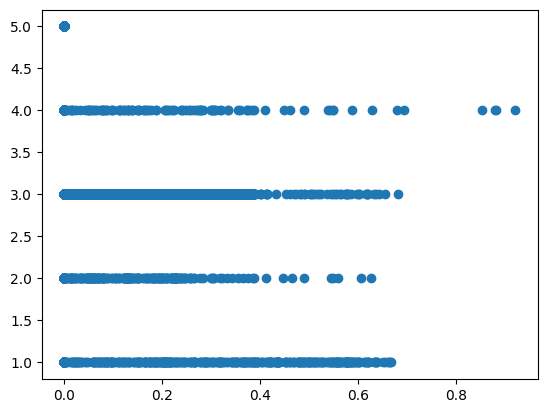

In [90]:
plt.scatter(X_res[:, 0].toarray(), y_res)

---

## 6. Review Stars Classification



In [32]:
# Import Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV

In [27]:
clf_model = {
    'rfc' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'criterion' : ['gini', 'entropy'],
        }
    },
    
    'dts' : {
        'model' : tree.DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini', 'entropy'],
            'splitter' : ['best', 'random']
        }
    },
    
    'lor' : {
        'model' : LogisticRegression(),
        'params' : {
            'penalty' : ['l1', 'l2', 'elasticnet'],
            'C' : [x for x in np.linspace(0, 1, num = 4)],
        }
    },
    
    'knn' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [x for x in range(1,11)],
            'weights' : ['uniform', 'distance'],
        }
    },
    
    'svm' : {
        'model' : SVC(),
        'params' : {
            'C' : [x for x in np.linspace(0, 1, num = 4)],
            'gamma' : ['scale', 'auto']
        }
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf

with tf.device('/device:GPU:0'):

    scores = []

    for model_name, mp in model_params.items():
        clf = RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,)
        clf.fit(X_res, y_res)
        scores.append({
            'model' : model_name,
            'best_score' : clf.best_score_,
            'best_params' : clf.best_params_,
        })

In [ ]:
score_result = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
score_result

In [91]:
clf_model = {
    'rfc' : RandomForestClassifier(),
    'dts' : tree.DecisionTreeClassifier(),
    'lor' : LogisticRegression(),
    'knn' : KNeighborsClassifier(),
    'svm' : SVC(),
}

In [96]:
start_time = time.time()

scores = []
for model_name in clf_model:
    clf = clf_model[model_name]
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    scores.append({
        'model' : model_name,
        'accuracy' : round(accuracy_score(y_test, y_pred), 2),
        'balance_accuracy' : balanced_accuracy_score(y_test, y_pred)
    })
    
print((time.time() - start_time) / 60)

C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


4.690022973219554


In [95]:
df_without_tuning = pd.DataFrame(scores)
df_without_tuning

,model,accuracy,balance_accuracy
0,rfc,0.708554,0.204946
1,dts,0.634309,0.284970
2,lor,0.718700,0.328359
3,knn,0.686189,0.220059
4,svm,0.715702,0.226016


In [43]:
svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [50]:
X_test.shape

(4337, 17224)

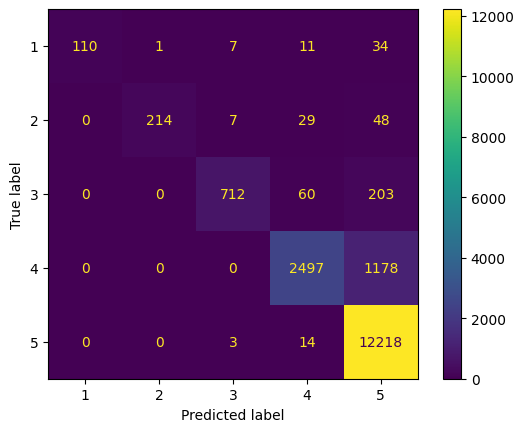

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svc, X_train, y_train)
plt.show()

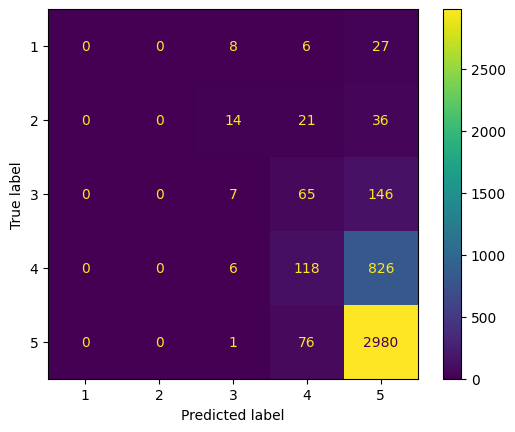

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

### 1. Random Forest 

In [33]:
start_time = time.time()

with tf.device('/device:GPU:0'):
    rfc = RandomizedSearchCV(RandomForestClassifier(), {
        'criterion' : ['gini', 'entropy'],
        'bootstrap' : [True, False],
        'random_state' : [x for x in range(1, 43)],
        'n_estimators' : [i for i in range(100, 1000, 10)]
    }, cv=5, return_train_score=False)
    
    rfc.fit(X_res, y_res)

print((time.time() - start_time) / 60)

KeyboardInterrupt: 

In [ ]:
rfc_res = pd.DataFrame(rfc.cv_results_)
rfc_res.sort_values(by='rank_test_score')

In [29]:
rfc = RandomForestClassifier(criterion='entropy', bootstrap=False)
rfc.fit(X_res, y_res)

y_pred = rfc.predict(X_test)

In [30]:
print('Precision: %.3f' % precision_score(y_test, y_pred, average="micro"))
print('Recall: %.3f' % recall_score(y_test, y_pred, average="micro"))
print('F1: %.3f' % f1_score(y_test, y_pred, average="micro"))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Precision: 0.727
Recall: 0.727
F1: 0.727
Accuracy: 0.727


---

### 2. Decision Tree

In [32]:
start_time = time.time()

with tf.device('/device:GPU:0'):
    dts = RandomizedSearchCV(tree.DecisionTreeClassifier(), {
        'criterion' : ['gini', 'entropy'],
        'splitter' : ['best', 'random']
    }, cv=5, return_train_score=False)
    
    dts.fit(X_res, y_res)

    
print((time.time() - start_time) / 60)

C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


0.9681353251139323


In [35]:
dts_res = pd.DataFrame(dts.cv_results_)
dts_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.862527,0.351704,0.007952,0.004941,best,gini,"{'splitter': 'best', 'criterion': 'gini'}",0.808970,0.869565,0.889079,0.908251,0.894557,0.874084,0.034847,3
1,2.332674,0.150110,0.012509,0.006254,random,gini,"{'splitter': 'random', 'criterion': 'gini'}",0.843547,0.866484,0.891818,0.892845,0.900719,0.879083,0.021172,2
2,3.464880,0.202507,0.007849,0.006988,best,entropy,"{'splitter': 'best', 'criterion': 'entropy'}",0.796987,0.864430,0.897638,0.885313,0.884971,0.865868,0.036053,4
3,2.315233,0.151309,0.001600,0.003200,random,entropy,"{'splitter': 'random', 'criterion': 'entropy'}",0.843889,0.868538,0.888737,0.904827,0.889764,0.879151,0.021070,1


In [66]:
rfc = RandomForestClassifier(criterion='entropy', bootstrap=False)
rfc.fit(X_res, y_res)

y_pred = rfc.predict(X_test)

In [39]:
print('Precision: %.3f' % precision_score(y_test, y_pred, average="micro"))
print('Recall: %.3f' % recall_score(y_test, y_pred, average="micro"))
print('F1: %.3f' % f1_score(y_test, y_pred, average="micro"))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Precision: 0.628
Recall: 0.628
F1: 0.628
Accuracy: 0.628


---

### 3. Logisitic Regression

In [143]:
start_time = time.time()

with tf.device('/device:GPU:0'):
    lor = RandomizedSearchCV(LogisticRegression(), {
        'penalty' : ['l1', 'l2', 'elasticnet'],
        'C' : [x for x in np.linspace(1e-9, 1, num = 4)],
        'solver' : ['saga'],
        'max_iter' : [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
    }, cv=5, return_train_score=False)
    
    lor.fit(X_res, y_res)

    
print((time.time() - start_time) / 60)

C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\tinob\anaconda3\

2.8840052405993144


C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [144]:
lor_res = pd.DataFrame(lor.cv_results_)
lor_res.sort_values(by='rank_test_score')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_penalty,param_max_iter,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.598222,0.006988,0.000000,0.000000,saga,l2,25,0.666667,"{'solver': 'saga', 'penalty': 'l2', 'max_iter'...",0.932900,0.939404,0.952756,0.951729,0.959945,0.947347,0.009788,1
4,3.364485,0.082827,0.004323,0.005705,saga,l1,25,0.666667,"{'solver': 'saga', 'penalty': 'l1', 'max_iter'...",0.890791,0.902431,0.924683,0.927764,0.932900,0.915714,0.016240,2
6,28.109565,0.174074,0.003523,0.006098,saga,l1,300,0.666667,"{'solver': 'saga', 'penalty': 'l1', 'max_iter'...",0.889764,0.901061,0.925368,0.926395,0.930503,0.914618,0.016175,3
3,2.266039,0.009522,0.000399,0.000797,saga,l1,25,0.333333,"{'solver': 'saga', 'penalty': 'l1', 'max_iter'...",0.863403,0.883259,0.903800,0.899007,0.904827,0.890859,0.015752,4
0,0.040035,0.008268,0.003531,0.006099,saga,l1,175,0.0,"{'solver': 'saga', 'penalty': 'l1', 'max_iter'...",0.199932,0.200274,0.200274,0.199932,0.200274,0.200137,0.000168,5
9,0.044959,0.007257,0.000399,0.000799,saga,l1,200,0.0,"{'solver': 'saga', 'penalty': 'l1', 'max_iter'...",0.200274,0.199932,0.199932,0.199932,0.199932,0.200000,0.000137,6
1,0.003117,0.006234,0.000000,0.000000,saga,elasticnet,125,0.333333,"{'solver': 'saga', 'penalty': 'elasticnet', 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
2,0.006250,0.007654,0.000000,0.000000,saga,elasticnet,300,0.333333,"{'solver': 'saga', 'penalty': 'elasticnet', 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
5,0.002004,0.001784,0.000000,0.000000,saga,elasticnet,25,0.0,"{'solver': 'saga', 'penalty': 'elasticnet', 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.003131,0.006263,0.000000,0.000000,saga,elasticnet,25,0.666667,"{'solver': 'saga', 'penalty': 'elasticnet', 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [145]:
lor = LogisticRegression(solver='saga', penalty='l2', C=0.66, max_iter=25)
lor.fit(X_res, y_res)

y_pred = lor.predict(X_train)

C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [146]:
print('Precision: %.3f' % precision_score(y_test, y_pred, average="micro"))
print('Recall: %.3f' % recall_score(y_test, y_pred, average="micro"))
print('F1: %.3f' % f1_score(y_test, y_pred, average="micro"))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Precision: 0.654
Recall: 0.654
F1: 0.654
Accuracy: 0.654


---

### 4. KNN

In [147]:
start_time = time.time()

with tf.device('/device:GPU:0'):
    knn = RandomizedSearchCV(KNeighborsClassifier(), {
        'n_neighbors' : [x for x in range(1,11)],
        'weights' : ['uniform', 'distance'],
        'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
        'p' : [x for x in range(1,11)]
    }, cv=5, return_train_score=False)
    
    knn.fit(X_res, y_res)

    
print((time.time() - start_time) / 60)

C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: 

1.3255675077438354


C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: 

In [148]:
knn_res = pd.DataFrame(knn.cv_results_)
knn_res.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_p,param_n_neighbors,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003192,0.003960,7.738327,0.257467,distance,1,1,kd_tree,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.973982,0.941801,0.982198,0.982540,0.980828,0.97227,0.015547,1
8,0.009244,0.005892,8.089652,0.119993,uniform,1,5,brute,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.897980,0.909620,0.938720,0.949332,0.939747,0.92708,0.019712,2
1,0.006249,0.007653,0.000000,0.000000,distance,7,10,ball_tree,"{'weights': 'distance', 'p': 7, 'n_neighbors':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,0.006249,0.007653,0.000000,0.000000,uniform,7,8,ball_tree,"{'weights': 'uniform', 'p': 7, 'n_neighbors': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,0.003125,0.006250,0.000000,0.000000,uniform,9,3,ball_tree,"{'weights': 'uniform', 'p': 9, 'n_neighbors': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,0.006248,0.007652,0.000000,0.000000,distance,10,9,ball_tree,"{'weights': 'distance', 'p': 10, 'n_neighbors'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
5,0.006248,0.007653,0.000000,0.000000,uniform,3,4,brute,"{'weights': 'uniform', 'p': 3, 'n_neighbors': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
6,0.003125,0.006250,0.000000,0.000000,uniform,9,5,ball_tree,"{'weights': 'uniform', 'p': 9, 'n_neighbors': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
7,0.007911,0.003906,0.000000,0.000000,distance,3,2,ball_tree,"{'weights': 'distance', 'p': 3, 'n_neighbors':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
9,0.007580,0.000799,0.000000,0.000000,distance,8,10,ball_tree,"{'weights': 'distance', 'p': 8, 'n_neighbors':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [149]:
knn = KNeighborsClassifier(weights='distance', p=1, n_neighbors=1, algorithm='kd_tree')
knn.fit(X_res, y_res)

y_pred = knn.predict(X_train)

C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


In [150]:
print('Precision: %.3f' % precision_score(y_test, y_pred, average="micro"))
print('Recall: %.3f' % recall_score(y_test, y_pred, average="micro"))
print('F1: %.3f' % f1_score(y_test, y_pred, average="micro"))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Precision: 0.676
Recall: 0.676
F1: 0.676
Accuracy: 0.676


---

### 5. SVM

In [27]:
start_time = time.time()

with tf.device('/device:GPU:0'):
    svm = RandomizedSearchCV(SVC(), {
        'C' : [x for x in np.linspace(1e-9, 1, num = 10)],
        'gamma' : ['scale', 'auto']
    }, cv=5, return_train_score=False)
    
    svm.fit(X_res, y_res)

    
print((time.time() - start_time) / 60)

C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tinob\anaconda3\envs\t

43.34122136433919


In [28]:
svm_res = pd.DataFrame(svm.cv_results_)
svm_res.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,26.321752,0.281618,6.553453,0.247323,scale,1.0,"{'gamma': 'scale', 'C': 1.0}",0.880520,0.954810,0.993153,0.991441,0.996577,0.963300,0.044079,1
4,27.684777,0.703942,7.000069,0.198804,scale,0.666667,"{'gamma': 'scale', 'C': 0.6666666666666666}",0.838754,0.941458,0.993838,0.992468,0.997261,0.952756,0.060613,2
2,31.876977,0.644109,8.239045,0.328345,scale,0.333333,"{'gamma': 'scale', 'C': 0.3333333333333333}",0.798699,0.922629,0.987333,0.984594,0.991099,0.936871,0.073565,3
3,112.964298,0.640530,17.079522,0.815605,auto,0.333333,"{'gamma': 'auto', 'C': 0.3333333333333333}",0.630264,0.724409,0.644985,0.592605,0.596713,0.637795,0.047624,4
5,119.405113,3.237845,17.681315,0.884376,auto,0.666667,"{'gamma': 'auto', 'C': 0.6666666666666666}",0.630264,0.724409,0.644985,0.592605,0.596713,0.637795,0.047624,4
7,117.701746,4.548755,18.027231,1.695686,auto,1.0,"{'gamma': 'auto', 'C': 1.0}",0.630264,0.724409,0.644985,0.592605,0.596713,0.637795,0.047624,4
0,0.058568,0.011577,0.000000,0.000000,scale,0.0,"{'gamma': 'scale', 'C': 0.0}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,0.024995,0.007651,0.000000,0.000000,auto,0.0,"{'gamma': 'auto', 'C': 0.0}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8


In [31]:
svm =SVC(gamma='scale',C=1.0)
svm.fit(X_res, y_res)

y_pred = svm.predict(X_test)

In [33]:
print('Precision: %.3f' % precision_score(y_test, y_pred, average="micro"))
print('Recall: %.3f' % recall_score(y_test, y_pred, average="micro"))
print('F1: %.3f' % f1_score(y_test, y_pred, average="micro"))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Precision: 0.730
Recall: 0.730
F1: 0.730
Accuracy: 0.730
